#Data Analysis with Python - TechPoint Sales Analysis

##1. Import Libraries and Dataset

###Import Libraries

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

###Import Raw Data

In [61]:
import pandas as pd

# Raw CSV URL from GitHub
github_csv_url = "https://raw.githubusercontent.com/abhishekg2048/Techpoint-Sales-Analysis/main/electronics_sales_dataset.csv"
df = pd.read_csv(github_csv_url)

##2. Dataset Sample

### Sample Data

In [62]:
df.head(10)

,Power_Usage,Item_ID,Item_Type,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Size,Outlet_Type,Outlet_Identifier,Item_Visibility,Item_Weight,Total_Sales,Rating
0,Medium,LPC19,Laptop and PC,2020,Tier 1,Large,Electronics Hub - Type 1,OUT002,0.049037,2.88,448.38,5
1,High,HMA45,Home Appliance,2000,Tier 1,Large,Multibrand Superstore,OUT003,0.336947,16.82,1027.71,4
2,High,HMA31,Home Appliance,2010,Tier 3,Large,Electronics Hub - Type 2,OUT004,0.927802,38.20,345.60,5
3,Medium,LPC61,Laptop and PC,2010,Tier 3,Large,Electronics Hub - Type 1,OUT005,0.882249,1.47,2969.07,1
4,Low,TBL74,Tablet,2009,Tier 3,Large,Multibrand Superstore,OUT006,0.739912,0.54,2341.07,5
5,High,HMA64,Home Appliance,2020,Tier 1,Small,Electronics Hub - Type 2,OUT007,0.293117,15.83,2292.64,5
6,Low,MBL22,Mobile Phones,2011,Tier 1,Medium,Electronics Hub - Type 1,OUT008,0.597781,0.30,2506.30,4
7,Low,SWR59,Smart Wearables,2008,Tier 1,Large,Electronics Hub - Type 2,OUT009,0.711230,0.10,339.97,3
8,Medium,LPC75,Laptop and PC,2007,Tier 2,Medium,Multibrand Superstore,OUT010,0.070968,1.41,2612.79,5
9,Medium,LPC11,Laptop and PC,2019,Tier 3,Large,Electronics Hub - Type 1,OUT011,0.274816,2.06,141.93,5


###Field Info

In [63]:
print("Size of data: ", df.shape)

Size of data:  (1000, 12)


In [64]:
df.columns

Index(['Power_Usage', 'Item_ID', 'Item_Type', 'Outlet_Establishment_Year',
       'Outlet_Location_Type', 'Outlet_Size', 'Outlet_Type',
       'Outlet_Identifier', 'Item_Visibility', 'Item_Weight', 'Total_Sales',
       'Rating'],
      dtype='object')

In [65]:
df.dtypes

,0
Power_Usage,object
Item_ID,object
Item_Type,object
Outlet_Establishment_Year,int64
Outlet_Location_Type,object
Outlet_Size,object
Outlet_Type,object
Outlet_Identifier,object
Item_Visibility,float64
Item_Weight,float64


##3. Business Requirements

###KPI Requirements

In [66]:
#Total Sales
total_sales = df['Total_Sales'].sum()

#Average Sales
avg_sales = df['Total_Sales'].mean()

#No.Items Sold
no_items_sold = df['Total_Sales'].count()

#Average Ratings
avg_rating = df['Rating'].mean()


# --- Display ---
print(f"Total Sales   : ${total_sales:,.0f}")
print(f"Average Sales : ${avg_sales:,.0f}")
print(f"No. Items Sold: {no_items_sold:,.0f}")
print(f"Average Rating: {avg_rating:,.1f}")

Total Sales   : $1,563,767
Average Sales : $1,564
No. Items Sold: 1,000
Average Rating: 4.1


###Chart Requirements

####Total Sales by Fat Content

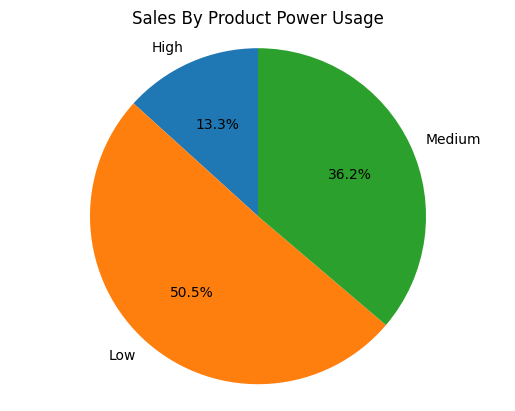

In [67]:
sales_by_power_usage = df.groupby("Power_Usage")['Total_Sales'].sum()

plt.pie(sales_by_power_usage, labels=sales_by_power_usage.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales By Product Power Usage')
plt.axis('equal')
plt.show()

####Total Sales by Item Type

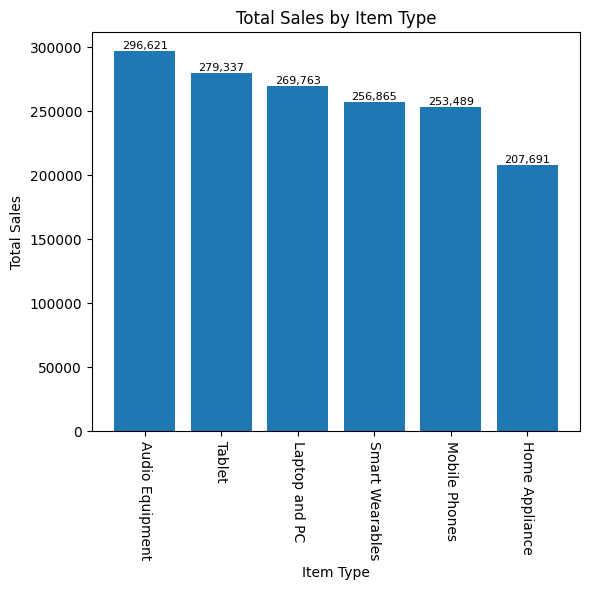

In [68]:
sales_by_type = df.groupby('Item_Type')['Total_Sales'].sum().sort_values(ascending=False)

plt.figure(figsize=(6,6))
bars = plt.bar(sales_by_type.index, sales_by_type.values)

plt.xticks(rotation=-90)
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.title('Total Sales by Item Type')

for bar in bars:
  plt.text(bar.get_x()+bar.get_width()/2, bar.get_height(), f'{bar.get_height():,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

####Product Power Usage for Total Sales

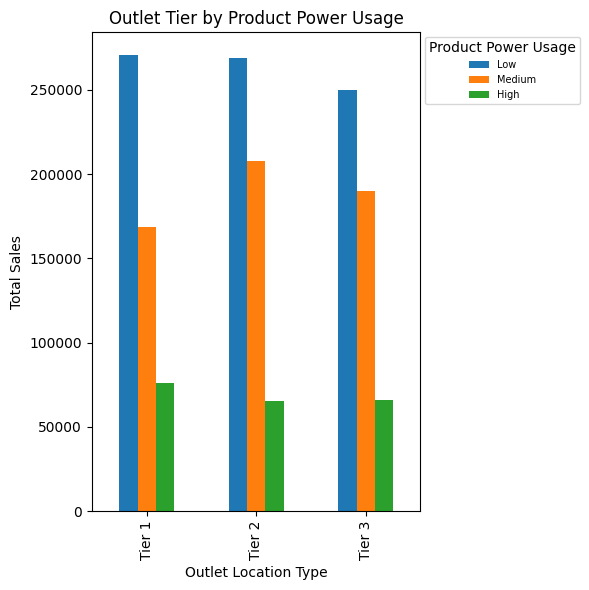

In [69]:
grouped = df.groupby(['Outlet_Location_Type','Power_Usage'])['Total_Sales'].sum().unstack()
grouped = grouped[['Low','Medium','High']]

ax = grouped.plot(kind='bar', figsize=(6,6), title='Outlet Tier by Product Power Usage')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Product Power Usage',fontsize=7,bbox_to_anchor=(1,1))
plt.tight_layout()
plt.show()

####Total Sales by Outlet Establishment

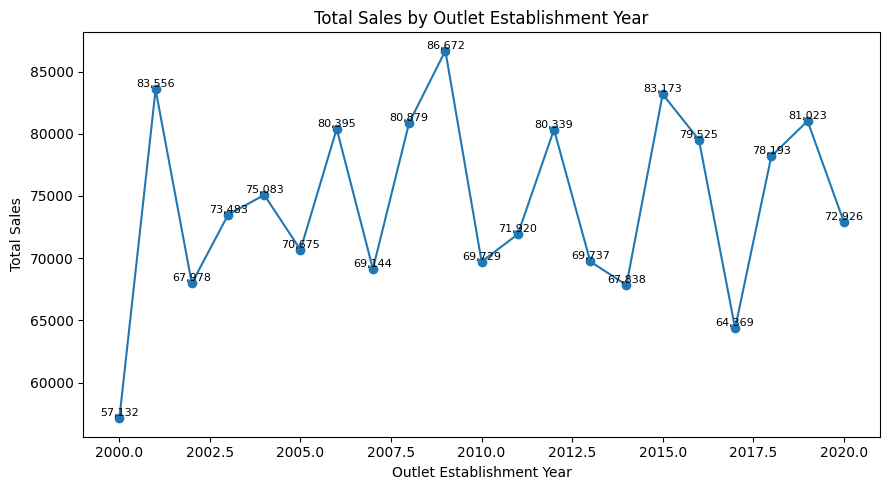

In [70]:
sales_by_year = df.groupby('Outlet_Establishment_Year')['Total_Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')
plt.title('Total Sales by Outlet Establishment Year')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')

for x,y in zip(sales_by_year.index, sales_by_year.values):
  plt.text(x,y, f'{y:,.0f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

####Sales by Outlet Size

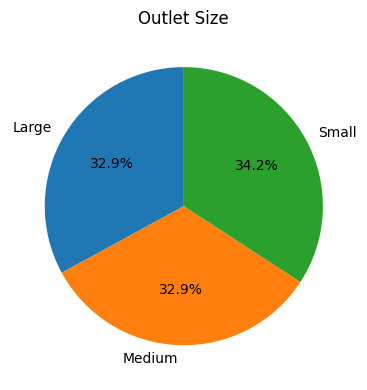

In [71]:
sales_by_size = df.groupby('Outlet_Size')['Total_Sales'].sum()

plt.figure(figsize=(4,4))
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

####Sales by Outlet Location

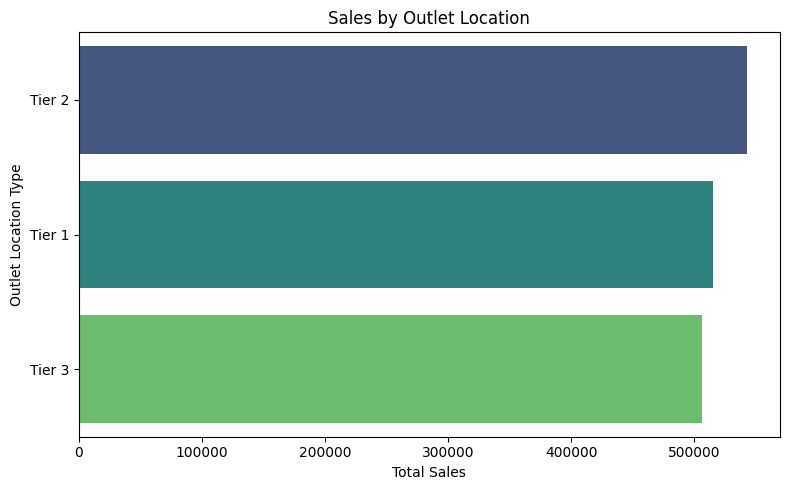

In [72]:
sales_by_location = df.groupby('Outlet_Location_Type')['Total_Sales'].sum().reset_index()
sales_by_location = sales_by_location.sort_values('Total_Sales',ascending=False)

plt.figure(figsize=(8,5))
ax = sns.barplot(x='Total_Sales', y='Outlet_Location_Type', data=sales_by_location, hue='Outlet_Location_Type', palette='viridis')
plt.title('Sales by Outlet Location')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Location Type')

plt.tight_layout()
plt.show()